In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

In [ ]:
data = pd.read_csv('dataSerieRLdf.csv')

In [ ]:
data['diff'] = data.real - data.pred

In [ ]:
data

,real,pred,diff
0,6200.376900,6523.196045,-322.819145
1,6250.402251,6210.962493,39.439758
2,6552.748635,6169.751525,382.997110
3,6124.770458,6504.042337,-379.271879
4,6343.576606,6115.806990,227.769616
...,...,...,...
3018,5128.181653,4518.625116,609.556537
3019,4664.154912,4873.990224,-209.835312
3020,4815.533061,4688.622952,126.910109
3021,4812.097524,4582.607170,229.490354


# Shapiro-Wilk test: testa o quão normal são os dados, é dado por uma estatística W no intervalo [0,1], quanto mais normal mais perto de 1.
Null Hypothesis (𝐻0): The sample is drawn from a normally distributed population.
Alternative Hypothesis (𝐻1​): The sample is not drawn from a normally distributed population.
A low 𝑝-value (typically 𝑝 < 0.05) indicates that the null hypothesis can be rejected, suggesting that the data is not normally distributed.
A high 𝑝-value suggests that there is no evidence to reject the null hypothesis of normality.
Os p-avlores deram todos 0, com o valor de W entre cada gráfico QQ.

ShapiroResult(statistic=0.742136538028717, pvalue=0.0)


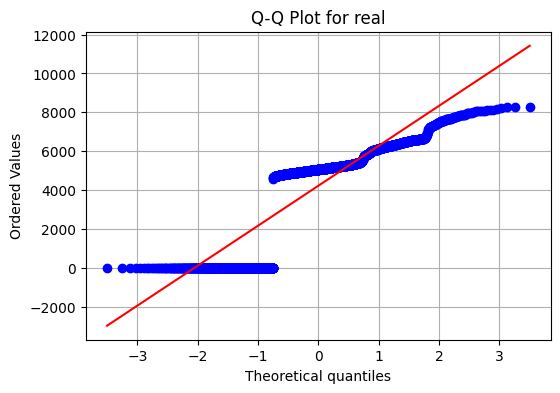

ShapiroResult(statistic=0.7566880583763123, pvalue=0.0)


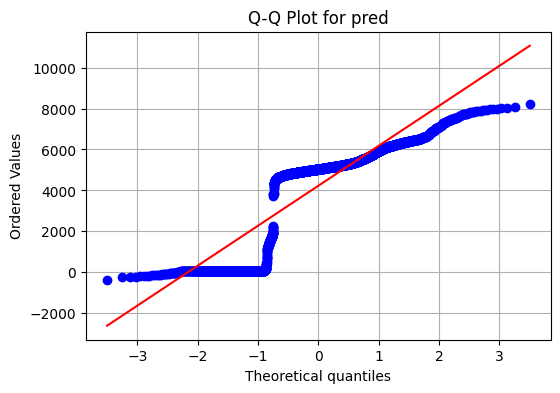

ShapiroResult(statistic=0.6054437160491943, pvalue=0.0)


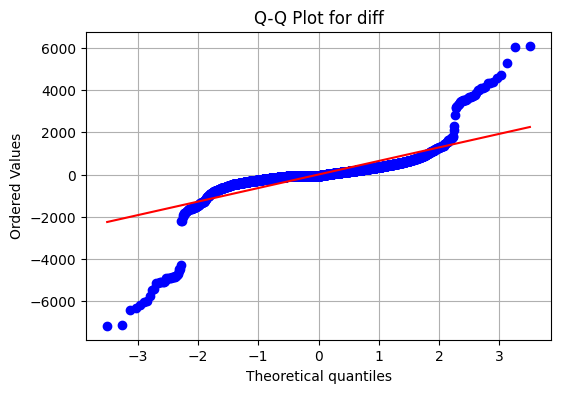

{'real': ('not normal', 0.0),
 'pred': ('not normal', 0.0),
 'diff': ('not normal', 0.0)}

In [ ]:
# Function to check normality using Shapiro-Wilk test and Q-Q plot
def check_normality(column):
    shapiro_test = stats.shapiro(column)
    print(shapiro_test)
    p_value = shapiro_test.pvalue
    normality = "normal" if p_value > 0.05 else "not normal"

    # Plotting the Q-Q plot
    plt.figure(figsize=(6, 4))
    stats.probplot(column, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column.name}')
    plt.grid()
    plt.show()

    return normality, p_value

# Checking normality for each column
normality_results = {}
for column in data.columns[0:]:
    normality_results[column] = check_normality(data[column])

normality_results


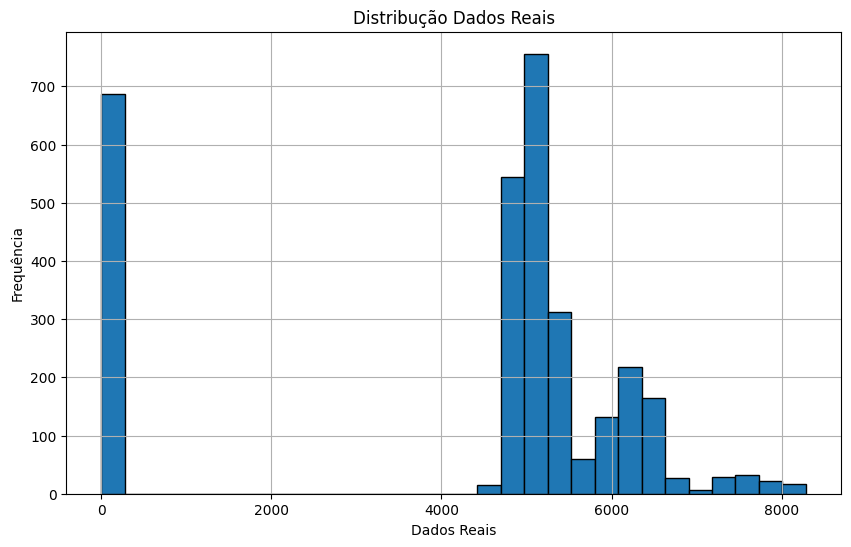

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data.real, bins=30, edgecolor='black')
plt.title('Distribução Dados Reais')
plt.xlabel('Dados Reais')
plt.ylabel('Frequência')
plt.grid()
plt.show()

In [ ]:
media_pob_dr = np.mean(data.real)
media_pob_dr

4230.728233860073

In [ ]:
std_pob_dr = np.std(data.real)
std_pob_dr

2379.975012664679

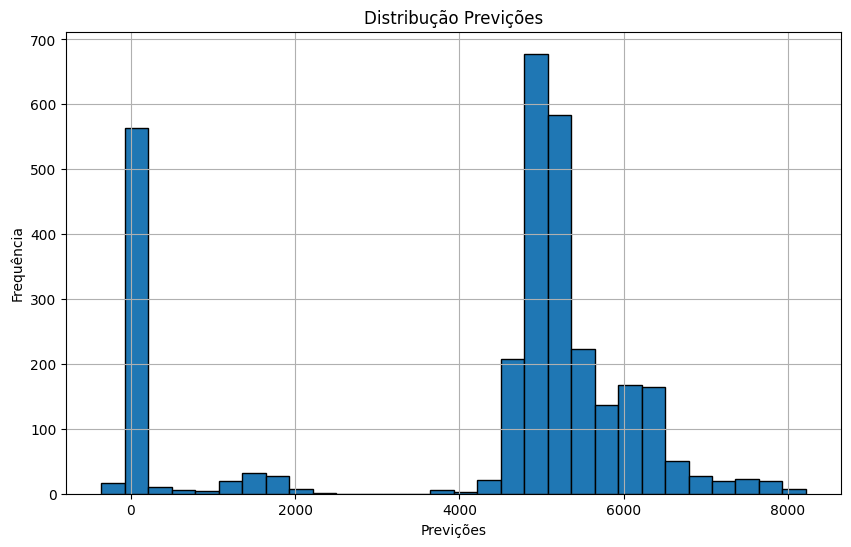

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data.pred, bins=30, edgecolor='black')
plt.title('Distribução Previções')
plt.xlabel('Previções')
plt.ylabel('Frequência')
plt.grid()
plt.show()

In [ ]:
media_pob_dp = np.mean(data.pred)
media_pob_dp

4229.49806197189

In [ ]:
std_pob_dp = np.std(data.pred)
std_pob_dp

2240.3954190781947

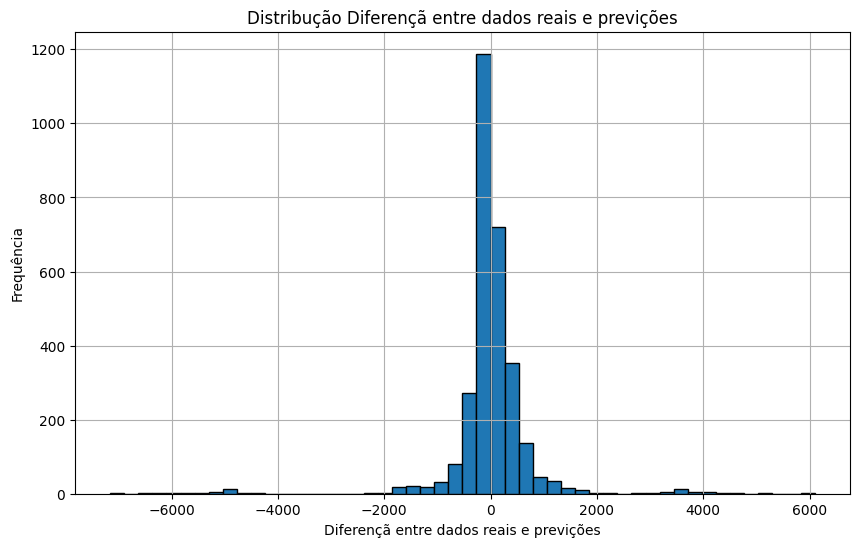

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['diff'], bins=50, edgecolor='black')
plt.title('Distribução Diferençã entre dados reais e previções')
plt.xlabel('Diferençã entre dados reais e previções')
plt.ylabel('Frequência')
plt.grid()
plt.show()

In [ ]:
media_pob_diff = np.mean(data['diff'])
media_pob_diff

1.2301718881828057

In [ ]:
std_pob_diff = np.std(data['diff'])
std_pob_diff

824.7975008893087

# Dados não normais, então aplicar bootstrap para verificar a distribuição das médias dos samples e verificar que pela clt converge para uma distribuição normal.

90% confidence interval: Lower limit = -24.52672827712747, Upper limit = 25.950099438270968
95% confidence interval: Lower limit = -30.801790203809627, Upper limit = 29.966494248220396
98% confidence interval: Lower limit = -33.78989412805364, Upper limit = 33.462814539196124


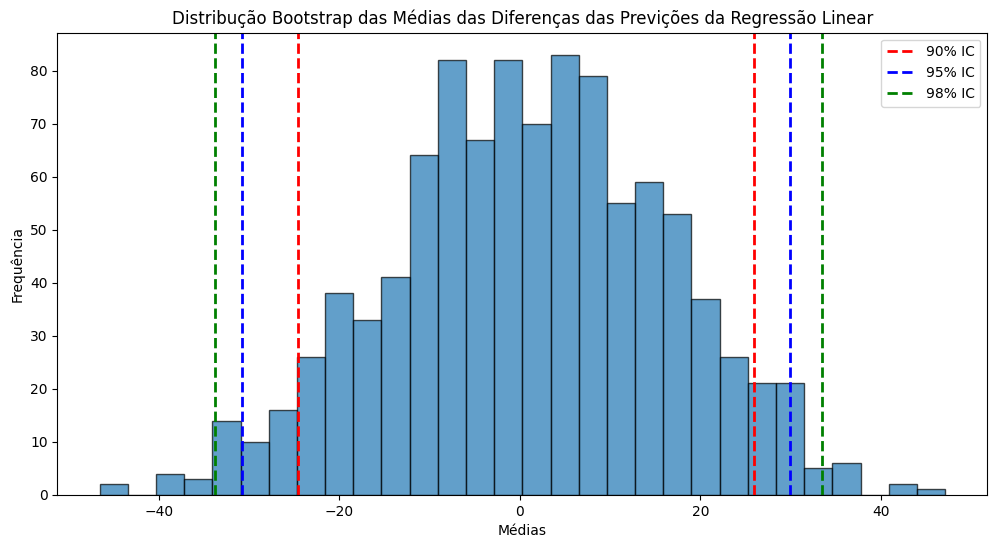

In [ ]:
n_bootstrap_samples = 1000

bootstrap_means = np.zeros(n_bootstrap_samples)

for i in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(data['diff'], size=len(data['diff']), replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)

ci_90 = np.percentile(bootstrap_means, [5, 95])
ci_95 = np.percentile(bootstrap_means, [2.5, 97.5])
ci_98 = np.percentile(bootstrap_means, [1, 99])

print(f"90% confidence interval: Lower limit = {ci_90[0]}, Upper limit = {ci_90[1]}")
print(f"95% confidence interval: Lower limit = {ci_95[0]}, Upper limit = {ci_95[1]}")
print(f"98% confidence interval: Lower limit = {ci_98[0]}, Upper limit = {ci_98[1]}")

plt.figure(figsize=(12, 6))
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(ci_90[0], color='red', linestyle='dashed', linewidth=2, label='90% IC')
plt.axvline(ci_90[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci_95[0], color='blue', linestyle='dashed', linewidth=2, label='95% IC')
plt.axvline(ci_95[1], color='blue', linestyle='dashed', linewidth=2)
plt.axvline(ci_98[0], color='green', linestyle='dashed', linewidth=2, label='98% IC')
plt.axvline(ci_98[1], color='green', linestyle='dashed', linewidth=2)
plt.title('Distribução Bootstrap das Médias das Diferenças das Previções da Regressão Linear')
plt.xlabel('Médias')
plt.ylabel('Frequência')
plt.legend()
plt.show()


# CLT ( a média da média dos samples converge para uma normal) e sample size grande (n = 3023) garante a aplicação do t-score abaixo

90% prediction interval: Lower limit = -1356.3059960327384, Upper limit = 1358.7663398091042
95% prediction interval: Lower limit = -1616.5260065218833, Upper limit = 1618.9863502982491
98% prediction interval: Lower limit = -1919.189201938432, Upper limit = 1921.6495457147978


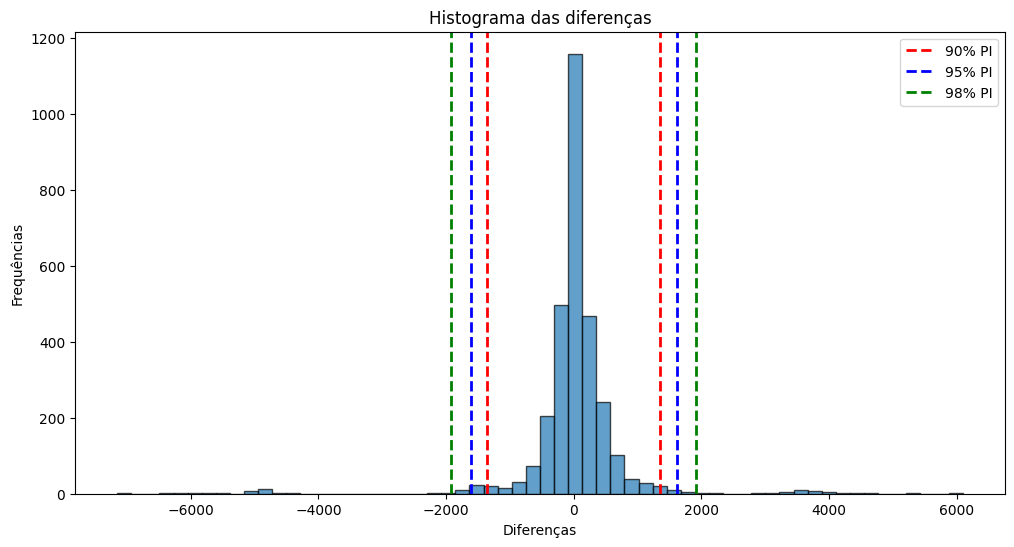

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def prediction_interval(column, confidence):
    n = len(column)
    mean = np.mean(column)
    std_dev = np.std(column, ddof=1)

    critical_value = stats.t.ppf((1 + confidence) / 2., n-1)

    margin_of_error = critical_value * std_dev * np.sqrt(1 + 1/n)

    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return lower_bound, upper_bound


pi_90 = np.zeros(2)
pi_95 = np.zeros(2)
pi_98 = np.zeros(2)

pi_90[0], pi_90[1] = prediction_interval(data['diff'], 0.90)
pi_95[0], pi_95[1] = prediction_interval(data['diff'], 0.95)
pi_98[0], pi_98[1] = prediction_interval(data['diff'], 0.98)

print(f"90% prediction interval: Lower limit = {pi_90[0]}, Upper limit = {pi_90[1]}")
print(f"95% prediction interval: Lower limit = {pi_95[0]}, Upper limit = {pi_95[1]}")
print(f"98% prediction interval: Lower limit = {pi_98[0]}, Upper limit = {pi_98[1]}")

plt.figure(figsize=(12, 6))
plt.hist(data['diff'], bins=60, edgecolor='k', alpha=0.7)
plt.axvline(pi_90[0], color='red', linestyle='dashed', linewidth=2, label='90% PI')
plt.axvline(pi_90[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(pi_95[0], color='blue', linestyle='dashed', linewidth=2, label='95% PI')
plt.axvline(pi_95[1], color='blue', linestyle='dashed', linewidth=2)
plt.axvline(pi_98[0], color='green', linestyle='dashed', linewidth=2, label='98% PI')
plt.axvline(pi_98[1], color='green', linestyle='dashed', linewidth=2)
plt.title('Histograma das diferenças')
plt.xlabel('Diferenças')
plt.ylabel('Frequências')
plt.legend()
plt.show()


90% prediction interval: Lower limit = -1388.1130255486698, Upper limit = 1411.8347747753735
95% prediction interval: Lower limit = -1657.2623708918843, Upper limit = 1680.984120118588
98% prediction interval: Lower limit = -1970.8413128048849, Upper limit = 1994.5630620315885


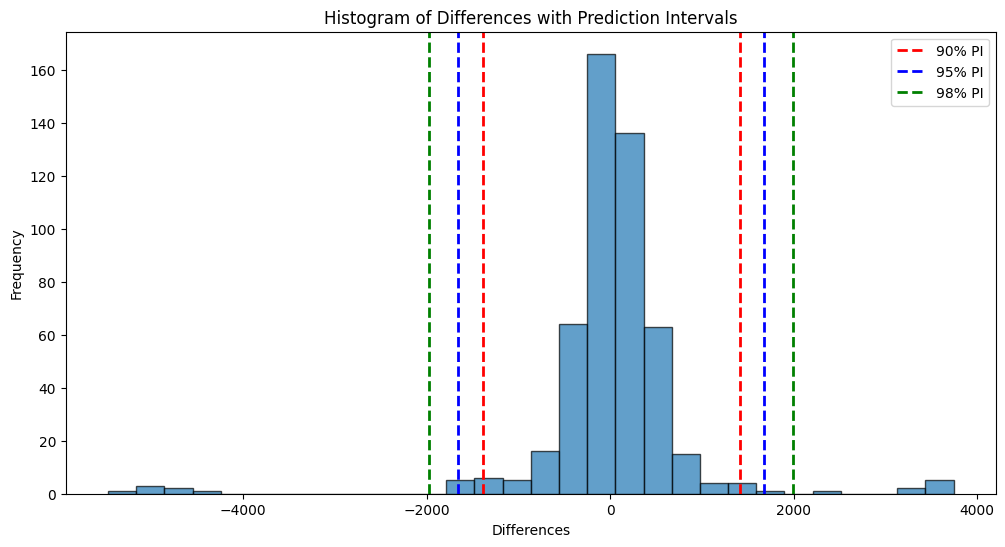

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def prediction_interval(column, confidence):
    n = len(column)
    mean = np.mean(column)
    std_dev = np.std(column, ddof=1)

    critical_value = stats.t.ppf((1 + confidence) / 2., n-1)

    margin_of_error = critical_value * std_dev * np.sqrt(1 + 1/n)

    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return lower_bound, upper_bound


pi_90 = np.zeros(2)
pi_95 = np.zeros(2)
pi_98 = np.zeros(2)

pi_90[0], pi_90[1] = prediction_interval(data['diff'][2523:3023], 0.90)
pi_95[0], pi_95[1] = prediction_interval(data['diff'][2523:3023], 0.95)
pi_98[0], pi_98[1] = prediction_interval(data['diff'][2523:3023], 0.98)

print(f"90% prediction interval: Lower limit = {pi_90[0]}, Upper limit = {pi_90[1]}")
print(f"95% prediction interval: Lower limit = {pi_95[0]}, Upper limit = {pi_95[1]}")
print(f"98% prediction interval: Lower limit = {pi_98[0]}, Upper limit = {pi_98[1]}")

plt.figure(figsize=(12, 6))
plt.hist(data['diff'][2523:3023], bins=30, edgecolor='k', alpha=0.7)
plt.axvline(pi_90[0], color='red', linestyle='dashed', linewidth=2, label='90% PI')
plt.axvline(pi_90[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(pi_95[0], color='blue', linestyle='dashed', linewidth=2, label='95% PI')
plt.axvline(pi_95[1], color='blue', linestyle='dashed', linewidth=2)
plt.axvline(pi_98[0], color='green', linestyle='dashed', linewidth=2, label='98% PI')
plt.axvline(pi_98[1], color='green', linestyle='dashed', linewidth=2)
plt.title('Histogram of Differences with Prediction Intervals')
plt.xlabel('Differences')
plt.ylabel('Frequency')
plt.legend()
plt.show()


90% prediction interval: Lower limit = -1294.2582041791384, Upper limit = 1338.490757955648
95% prediction interval: Lower limit = -1550.9904880053105, Upper limit = 1595.22304178182
98% prediction interval: Lower limit = -1852.566566690722, Upper limit = 1896.7991204672317


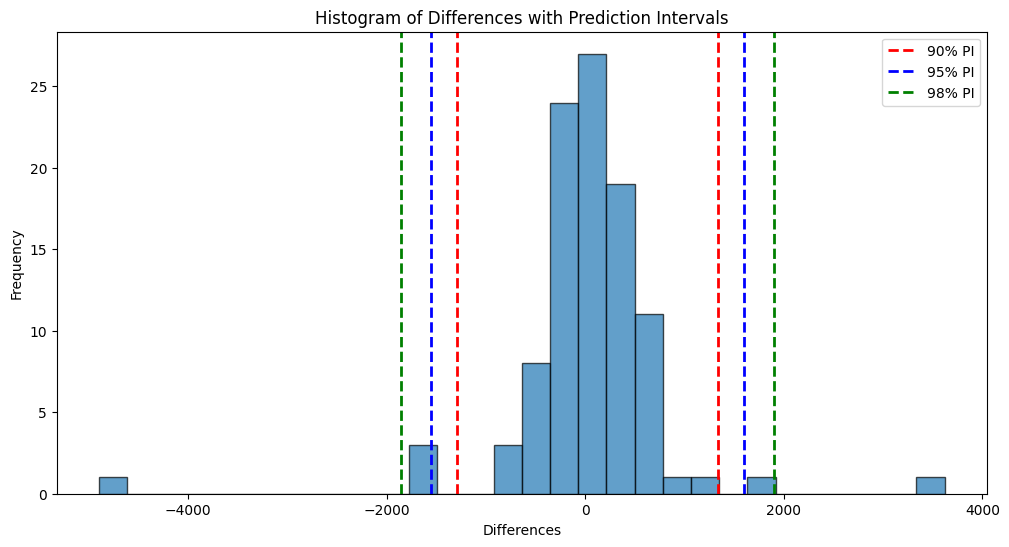

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def prediction_interval(column, confidence):
    n = len(column)
    mean = np.mean(column)
    std_dev = np.std(column, ddof=1)

    critical_value = stats.t.ppf((1 + confidence) / 2., n-1)

    margin_of_error = critical_value * std_dev * np.sqrt(1 + 1/n)

    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return lower_bound, upper_bound


pi_90 = np.zeros(2)
pi_95 = np.zeros(2)
pi_98 = np.zeros(2)

pi_90[0], pi_90[1] = prediction_interval(data['diff'][2523:2623], 0.90)
pi_95[0], pi_95[1] = prediction_interval(data['diff'][2523:2623], 0.95)
pi_98[0], pi_98[1] = prediction_interval(data['diff'][2523:2623], 0.98)

print(f"90% prediction interval: Lower limit = {pi_90[0]}, Upper limit = {pi_90[1]}")
print(f"95% prediction interval: Lower limit = {pi_95[0]}, Upper limit = {pi_95[1]}")
print(f"98% prediction interval: Lower limit = {pi_98[0]}, Upper limit = {pi_98[1]}")

plt.figure(figsize=(12, 6))
plt.hist(data['diff'][2523:2623], bins=30, edgecolor='k', alpha=0.7)
plt.axvline(pi_90[0], color='red', linestyle='dashed', linewidth=2, label='90% PI')
plt.axvline(pi_90[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(pi_95[0], color='blue', linestyle='dashed', linewidth=2, label='95% PI')
plt.axvline(pi_95[1], color='blue', linestyle='dashed', linewidth=2)
plt.axvline(pi_98[0], color='green', linestyle='dashed', linewidth=2, label='98% PI')
plt.axvline(pi_98[1], color='green', linestyle='dashed', linewidth=2)
plt.title('Histogram of Differences with Prediction Intervals')
plt.xlabel('Differences')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## 95% IC

In [ ]:
data_pi_95_inf = data[data['diff'] < pi_95[0]]
data_pi_95_inf

,real,pred,diff
51,0.0,6400.188620,-6400.188620
52,0.0,1806.985143,-1806.985143
173,0.0,6328.212763,-6328.212763
174,0.0,1840.135502,-1840.135502
265,0.0,6015.772836,-6015.772836
...,...,...,...
2732,0.0,5086.294670,-5086.294670
2781,0.0,5150.304353,-5150.304353
2887,0.0,4783.796288,-4783.796288
2966,0.0,5474.492770,-5474.492770


In [ ]:
data_pi_95_sup = data[data['diff'] > pi_95[1]]
data_pi_95_sup

,real,pred,diff
53,6154.617009,2052.556863,4102.060146
175,6617.546639,2039.558898,4577.987741
871,5358.809363,67.489406,5291.319957
872,5493.173048,3838.349799,1654.823249
873,5435.977601,3802.144626,1633.832975
874,5382.878430,3744.574509,1638.303921
879,8103.605039,4417.443784,3686.161255
880,8135.322407,6460.879477,1674.442930
881,8262.798755,6497.728428,1765.070327
892,8085.856996,5268.508738,2817.348258


In [ ]:
data_pi_95 = pd.concat([data_pi_95_inf, data_pi_95_sup])
data_pi_95

,real,pred,diff
51,0.000000,6400.188620,-6400.188620
52,0.000000,1806.985143,-1806.985143
173,0.000000,6328.212763,-6328.212763
174,0.000000,1840.135502,-1840.135502
265,0.000000,6015.772836,-6015.772836
...,...,...,...
2782,4931.282957,1662.133987,3269.148970
2889,5108.704335,1568.592095,3540.112240
2968,5003.971741,1555.047940,3448.923801
2985,7163.974910,4861.972384,2302.002526


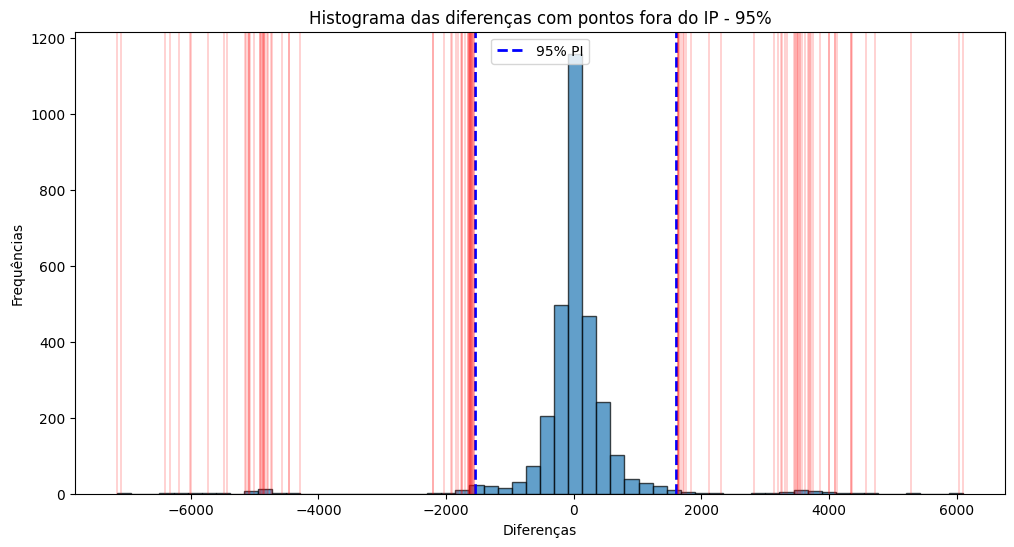

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data['diff'], bins=60, edgecolor='k', alpha=0.7)
plt.axvline(pi_95[0], color='blue', linestyle='dashed', linewidth=2, label='95% PI')
plt.axvline(pi_95[1], color='blue', linestyle='dashed', linewidth=2)
for d in data_pi_95['diff']:
  plt.axvline(d, color='red', linewidth=0.25)
plt.title('Histograma das diferenças com pontos fora do IP - 95%')
plt.xlabel('Diferenças')
plt.ylabel('Frequências')
plt.legend()
plt.show()

In [ ]:
p = len(data_pi_95)/len(data)*100
print('percentual de pontos que caem fora do intervalo de previsão de 95 %:')
print(f'{p} %')


percentual de pontos que caem fora do intervalo de previsão de 95 %:
3.6056897122064178 %


In [ ]:
outpred500_pi_95 = data_pi_95[(data_pi_95.index >= 2523) & (data_pi_95.index <= 3023)]
outpred500_pi_95

,real,pred,diff
2550,0.000000,4894.771231,-4894.771231
2551,0.000000,1596.220727,-1596.220727
2552,0.000000,1603.685098,-1603.685098
2553,0.000000,1643.409703,-1643.409703
2643,0.000000,4460.485141,-4460.485141
2732,0.000000,5086.294670,-5086.294670
2781,0.000000,5150.304353,-5150.304353
2887,0.000000,4783.796288,-4783.796288
2966,0.000000,5474.492770,-5474.492770
3011,0.000000,4747.356397,-4747.356397


In [ ]:
data['inferior_95'] = data['real'] + pi_95[0]
data['superior_95'] = data['real'] + pi_95[1]
data

,real,pred,diff,inferior_95,superior_95
0,6200.376900,6523.196045,-322.819145,4649.386412,7795.599942
1,6250.402251,6210.962493,39.439758,4699.411763,7845.625293
2,6552.748635,6169.751525,382.997110,5001.758147,8147.971677
3,6124.770458,6504.042337,-379.271879,4573.779970,7719.993500
4,6343.576606,6115.806990,227.769616,4792.586118,7938.799648
...,...,...,...,...,...
3018,5128.181653,4518.625116,609.556537,3577.191165,6723.404695
3019,4664.154912,4873.990224,-209.835312,3113.164424,6259.377954
3020,4815.533061,4688.622952,126.910109,3264.542573,6410.756103
3021,4812.097524,4582.607170,229.490354,3261.107036,6407.320566


In [ ]:
outpred100_pi_95 = data_pi_95[(data_pi_95.index >= 2523) & (data_pi_95.index <= 2623)]
outpred100_pi_95

,real,pred,diff
2550,0.000000,4894.771231,-4894.771231
2551,0.000000,1596.220727,-1596.220727
2552,0.000000,1603.685098,-1603.685098
2553,0.000000,1643.409703,-1643.409703
2554,4895.657395,1276.745682,3618.911713
2604,7512.353897,5674.581372,1837.772525


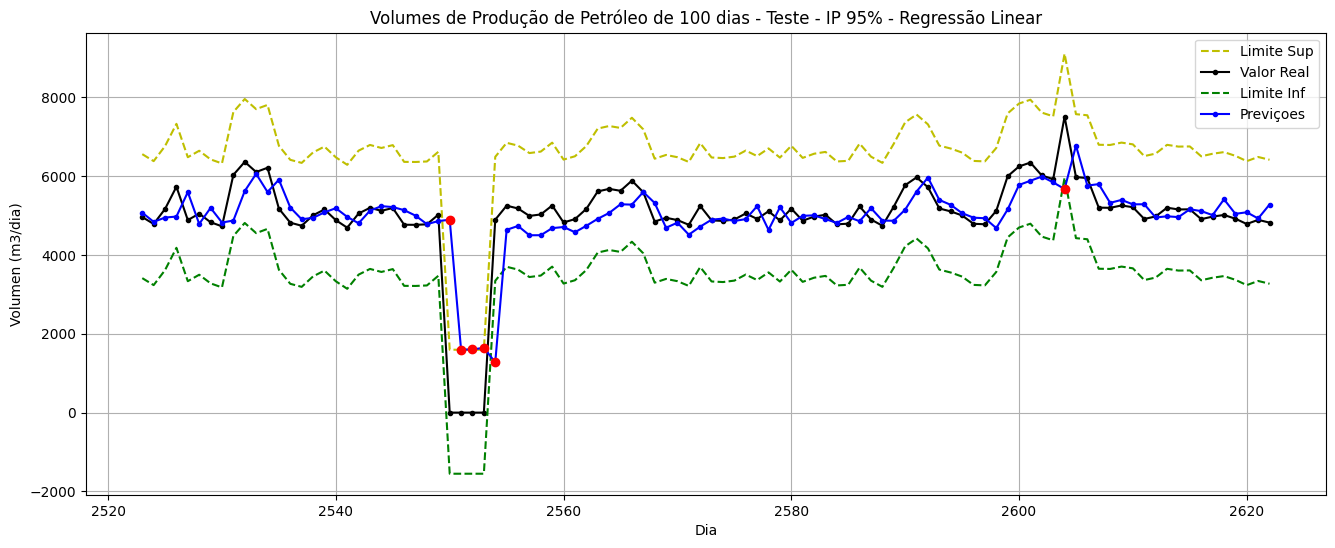

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(data.superior_95[2523:2623], '--y')
plt.plot(data.real[2523:2623], '.-k')
plt.plot(data.inferior_95[2523:2623], '--g')
plt.plot(data.pred[2523:2623], '.-b')
for i in range(len(outpred100_pi_95)):
    plt.plot(outpred100_pi_95.index[i], outpred100_pi_95['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo de 100 dias - Teste - IP 95% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend(['Limite Sup', 'Valor Real', 'Limite Inf', 'Previçoes'])
plt.grid()
plt.show()

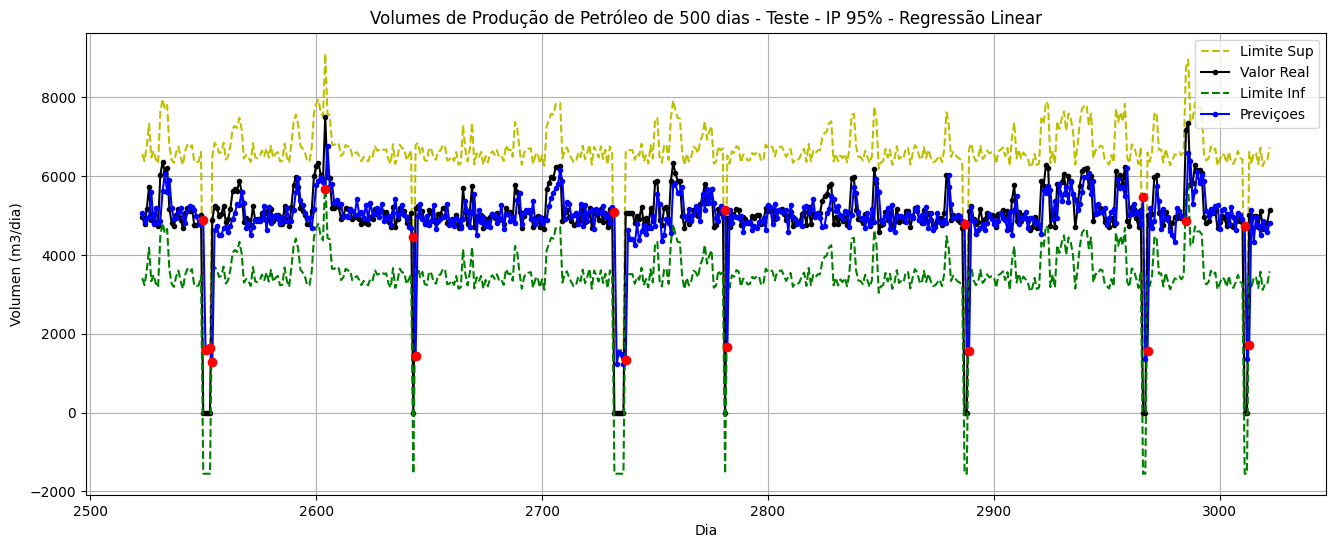

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(data.superior_95[2523:3023], '--y')
plt.plot(data.real[2523:3023], '.-k')
plt.plot(data.inferior_95[2523:3023], '--g')
plt.plot(data.pred[2523:3023], '.-b')
for i in range(len(outpred500_pi_95)):
    plt.plot(outpred500_pi_95.index[i], outpred500_pi_95['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo de 500 dias - Teste - IP 95% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend(['Limite Sup', 'Valor Real', 'Limite Inf', 'Previçoes'])
plt.grid()
plt.show()

## 90% IC

In [ ]:
data_pi_90_inf = data[data['diff'] < pi_90[0]]
data_pi_90_inf

,real,pred,diff,inferior_95,superior_95
51,0.000000,6400.188620,-6400.188620,-1550.990488,1595.223042
52,0.000000,1806.985143,-1806.985143,-1550.990488,1595.223042
173,0.000000,6328.212763,-6328.212763,-1550.990488,1595.223042
174,0.000000,1840.135502,-1840.135502,-1550.990488,1595.223042
265,0.000000,6015.772836,-6015.772836,-1550.990488,1595.223042
...,...,...,...,...,...
2959,4868.535807,6217.035537,-1348.499730,3317.545319,6463.758849
2966,0.000000,5474.492770,-5474.492770,-1550.990488,1595.223042
2967,0.000000,1349.643089,-1349.643089,-1550.990488,1595.223042
3011,0.000000,4747.356397,-4747.356397,-1550.990488,1595.223042


In [ ]:
data_pi_90_sup = data[data['diff'] > pi_90[1]]
data_pi_90_sup

,real,pred,diff,inferior_95,superior_95
53,6154.617009,2052.556863,4102.060146,4603.626521,7749.840051
175,6617.546639,2039.558898,4577.987741,5066.556151,8212.769681
871,5358.809363,67.489406,5291.319957,3807.818875,6954.032405
872,5493.173048,3838.349799,1654.823249,3942.182560,7088.396090
873,5435.977601,3802.144626,1633.832975,3884.987113,7031.200643
874,5382.878430,3744.574509,1638.303921,3831.887942,6978.101472
879,8103.605039,4417.443784,3686.161255,6552.614551,9698.828081
880,8135.322407,6460.879477,1674.442930,6584.331919,9730.545449
881,8262.798755,6497.728428,1765.070327,6711.808267,9858.021797
883,7942.119015,6489.117047,1453.001968,6391.128527,9537.342057


In [ ]:
data_pi_90 = pd.concat([data_pi_90_inf, data_pi_90_sup])
data_pi_90

,real,pred,diff,inferior_95,superior_95
51,0.000000,6400.188620,-6400.188620,-1550.990488,1595.223042
52,0.000000,1806.985143,-1806.985143,-1550.990488,1595.223042
173,0.000000,6328.212763,-6328.212763,-1550.990488,1595.223042
174,0.000000,1840.135502,-1840.135502,-1550.990488,1595.223042
265,0.000000,6015.772836,-6015.772836,-1550.990488,1595.223042
...,...,...,...,...,...
2782,4931.282957,1662.133987,3269.148970,3380.292469,6526.505999
2889,5108.704335,1568.592095,3540.112240,3557.713847,6703.927377
2968,5003.971741,1555.047940,3448.923801,3452.981253,6599.194783
2985,7163.974910,4861.972384,2302.002526,5612.984422,8759.197952


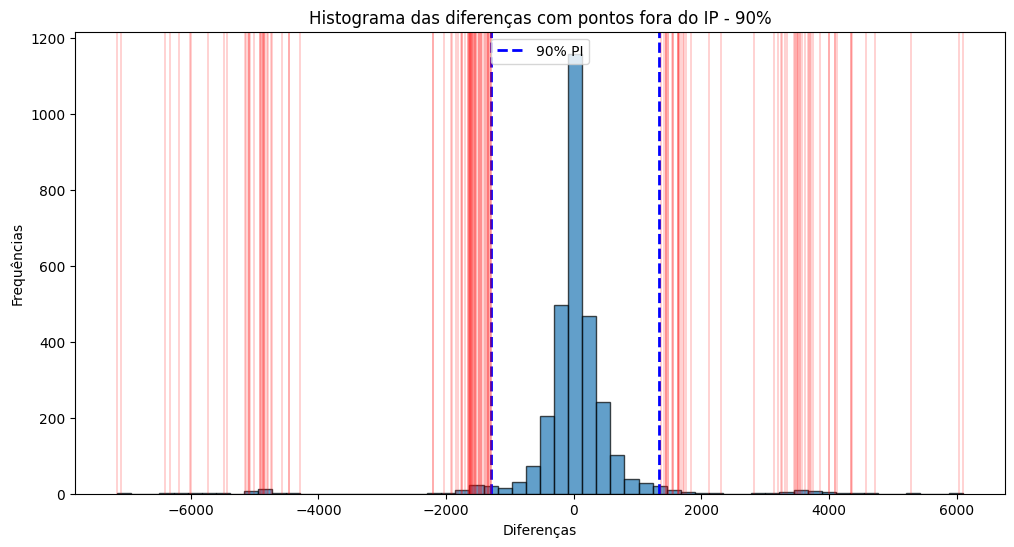

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data['diff'], bins=60, edgecolor='k', alpha=0.7)
plt.axvline(pi_90[0], color='blue', linestyle='dashed', linewidth=2, label='90% PI')
plt.axvline(pi_90[1], color='blue', linestyle='dashed', linewidth=2)
for d in data_pi_90['diff']:
  plt.axvline(d, color='red', linewidth=0.25)
plt.title('Histograma das diferenças com pontos fora do IP - 90%')
plt.xlabel('Diferenças')
plt.ylabel('Frequências')
plt.legend()
plt.show()

In [ ]:
p = len(data_pi_90)/len(data)*100
print('percentual de pontos que caem fora do intervalo de previsão de 90 %:')
print(f'{p} %')


percentual de pontos que caem fora do intervalo de previsão de 90 %:
4.664240820377109 %


In [ ]:
outpred500_pi_90 = data_pi_90[(data_pi_90.index >= 2523) & (data_pi_90.index <= 3023)]
outpred500_pi_90

,real,pred,diff,inferior_95,superior_95
2550,0.000000,4894.771231,-4894.771231,-1550.990488,1595.223042
2551,0.000000,1596.220727,-1596.220727,-1550.990488,1595.223042
2552,0.000000,1603.685098,-1603.685098,-1550.990488,1595.223042
2553,0.000000,1643.409703,-1643.409703,-1550.990488,1595.223042
2643,0.000000,4460.485141,-4460.485141,-1550.990488,1595.223042
2732,0.000000,5086.294670,-5086.294670,-1550.990488,1595.223042
2734,0.000000,1543.564694,-1543.564694,-1550.990488,1595.223042
2735,0.000000,1475.367032,-1475.367032,-1550.990488,1595.223042
2781,0.000000,5150.304353,-5150.304353,-1550.990488,1595.223042
2887,0.000000,4783.796288,-4783.796288,-1550.990488,1595.223042


In [ ]:
data['inferior_90'] = data['real'] + pi_90[0]
data['superior_90'] = data['real'] + pi_90[1]
data

,real,pred,diff,inferior_95,superior_95,inferior_90,superior_90
0,6200.376900,6523.196045,-322.819145,4649.386412,7795.599942,4906.118696,7538.867658
1,6250.402251,6210.962493,39.439758,4699.411763,7845.625293,4956.144047,7588.893009
2,6552.748635,6169.751525,382.997110,5001.758147,8147.971677,5258.490431,7891.239393
3,6124.770458,6504.042337,-379.271879,4573.779970,7719.993500,4830.512254,7463.261216
4,6343.576606,6115.806990,227.769616,4792.586118,7938.799648,5049.318402,7682.067364
...,...,...,...,...,...,...,...
3018,5128.181653,4518.625116,609.556537,3577.191165,6723.404695,3833.923449,6466.672411
3019,4664.154912,4873.990224,-209.835312,3113.164424,6259.377954,3369.896708,6002.645670
3020,4815.533061,4688.622952,126.910109,3264.542573,6410.756103,3521.274857,6154.023819
3021,4812.097524,4582.607170,229.490354,3261.107036,6407.320566,3517.839320,6150.588282


In [ ]:
outpred100_pi_90 = data_pi_90[(data_pi_90.index >= 2523) & (data_pi_90.index <= 2623)]
outpred100_pi_90

,real,pred,diff,inferior_95,superior_95
2550,0.000000,4894.771231,-4894.771231,-1550.990488,1595.223042
2551,0.000000,1596.220727,-1596.220727,-1550.990488,1595.223042
2552,0.000000,1603.685098,-1603.685098,-1550.990488,1595.223042
2553,0.000000,1643.409703,-1643.409703,-1550.990488,1595.223042
2554,4895.657395,1276.745682,3618.911713,3344.666907,6490.880437
2604,7512.353897,5674.581372,1837.772525,5961.363409,9107.576939


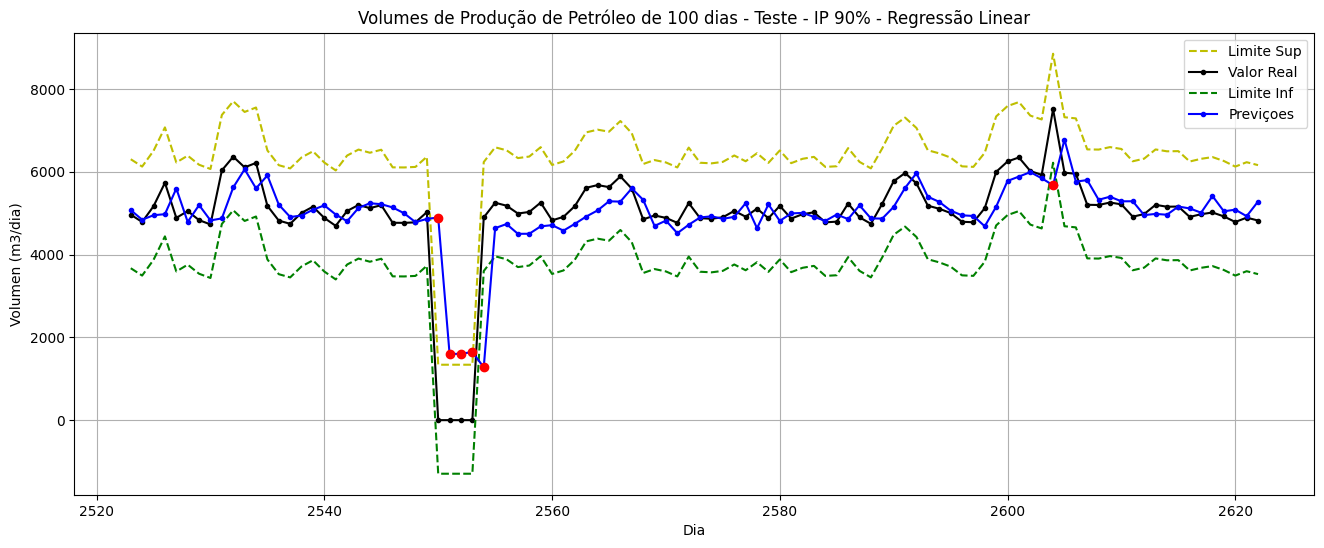

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(data.superior_90[2523:2623], '--y')
plt.plot(data.real[2523:2623], '.-k')
plt.plot(data.inferior_90[2523:2623], '--g')
plt.plot(data.pred[2523:2623], '.-b')
for i in range(len(outpred100_pi_90)):
    plt.plot(outpred100_pi_90.index[i], outpred100_pi_90['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo de 100 dias - Teste - IP 90% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend(['Limite Sup', 'Valor Real', 'Limite Inf', 'Previçoes'])
plt.grid()
plt.show()

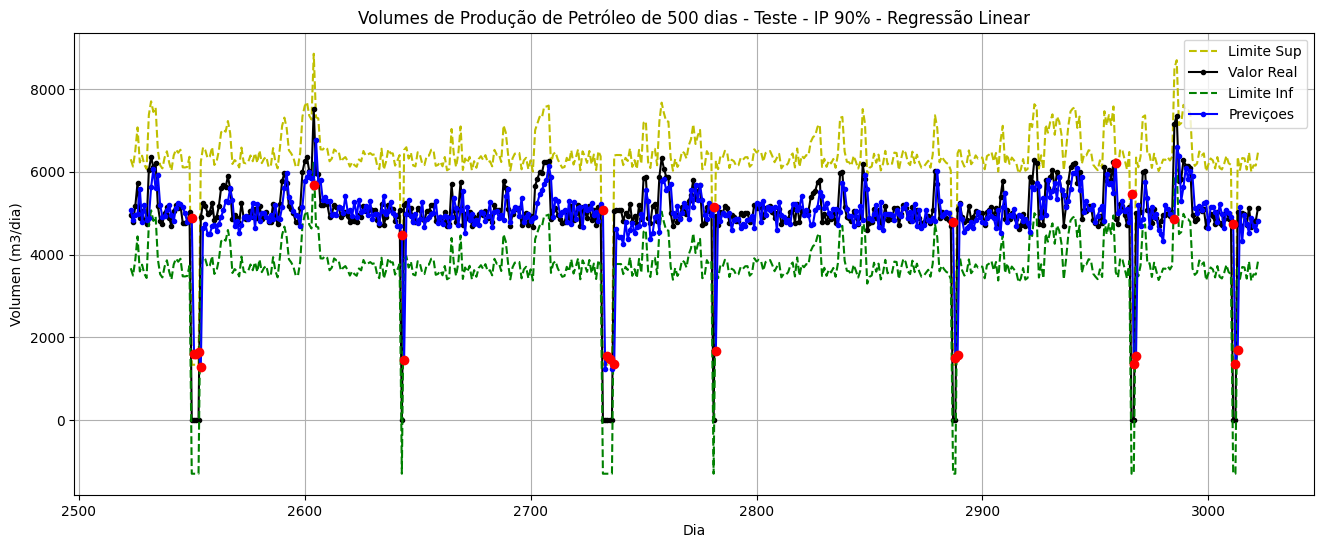

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(data.superior_90[2523:3023], '--y')
plt.plot(data.real[2523:3023], '.-k')
plt.plot(data.inferior_90[2523:3023], '--g')
plt.plot(data.pred[2523:3023], '.-b')
for i in range(len(outpred500_pi_90)):
    plt.plot(outpred500_pi_90.index[i], outpred500_pi_90['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo de 500 dias - Teste - IP 90% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend(['Limite Sup', 'Valor Real', 'Limite Inf', 'Previçoes'])
plt.grid()
plt.show()

## 98% IC

In [ ]:
data_pi_98_inf = data[data['diff'] < pi_98[0]]
data_pi_98_inf

,real,pred,diff,inferior_95,superior_95,inferior_90,superior_90
51,0.000000,6400.188620,-6400.188620,-1550.990488,1595.223042,-1294.258204,1338.490758
173,0.000000,6328.212763,-6328.212763,-1550.990488,1595.223042,-1294.258204,1338.490758
265,0.000000,6015.772836,-6015.772836,-1550.990488,1595.223042,-1294.258204,1338.490758
267,0.000000,2208.203929,-2208.203929,-1550.990488,1595.223042,-1294.258204,1338.490758
268,0.000000,2197.576468,-2197.576468,-1550.990488,1595.223042,-1294.258204,1338.490758
885,5037.400248,7069.651128,-2032.250880,3486.409760,6632.623290,3743.142044,6375.891006
896,0.000000,7154.113617,-7154.113617,-1550.990488,1595.223042,-1294.258204,1338.490758
898,0.000000,1923.056215,-1923.056215,-1550.990488,1595.223042,-1294.258204,1338.490758
910,0.000000,7097.899223,-7097.899223,-1550.990488,1595.223042,-1294.258204,1338.490758
1018,0.000000,5994.584375,-5994.584375,-1550.990488,1595.223042,-1294.258204,1338.490758


In [ ]:
data_pi_98_sup = data[data['diff'] > pi_98[1]]
data_pi_98_sup

,real,pred,diff,inferior_95,superior_95,inferior_90,superior_90
53,6154.617009,2052.556863,4102.060146,4603.626521,7749.840051,4860.358805,7493.107767
175,6617.546639,2039.558898,4577.987741,5066.556151,8212.769681,5323.288435,7956.037397
871,5358.809363,67.489406,5291.319957,3807.818875,6954.032405,4064.551159,6697.300121
879,8103.605039,4417.443784,3686.161255,6552.614551,9698.828081,6809.346835,9442.095797
892,8085.856996,5268.508738,2817.348258,6534.866508,9681.080038,6791.598792,9424.347754
899,8269.257548,2175.062589,6094.194959,6718.267060,9864.480590,6974.999344,9607.748306
911,8286.098659,2255.772213,6030.326446,6735.108171,9881.321701,6991.840455,9624.589417
1019,6032.683486,1913.587409,4119.096077,4481.692998,7627.906528,4738.425282,7371.174244
1067,5857.736021,1764.124246,4093.611775,4306.745533,7452.959063,4563.477817,7196.226779
1083,5160.614979,2028.909191,3131.705788,3609.624491,6755.838021,3866.356775,6499.105737


In [ ]:
data_pi_98 = pd.concat([data_pi_98_inf, data_pi_98_sup])
data_pi_98

,real,pred,diff,inferior_95,superior_95,inferior_90,superior_90
51,0.000000,6400.188620,-6400.188620,-1550.990488,1595.223042,-1294.258204,1338.490758
173,0.000000,6328.212763,-6328.212763,-1550.990488,1595.223042,-1294.258204,1338.490758
265,0.000000,6015.772836,-6015.772836,-1550.990488,1595.223042,-1294.258204,1338.490758
267,0.000000,2208.203929,-2208.203929,-1550.990488,1595.223042,-1294.258204,1338.490758
268,0.000000,2197.576468,-2197.576468,-1550.990488,1595.223042,-1294.258204,1338.490758
...,...,...,...,...,...,...,...
2782,4931.282957,1662.133987,3269.148970,3380.292469,6526.505999,3637.024753,6269.773715
2889,5108.704335,1568.592095,3540.112240,3557.713847,6703.927377,3814.446131,6447.195093
2968,5003.971741,1555.047940,3448.923801,3452.981253,6599.194783,3709.713537,6342.462499
2985,7163.974910,4861.972384,2302.002526,5612.984422,8759.197952,5869.716706,8502.465668


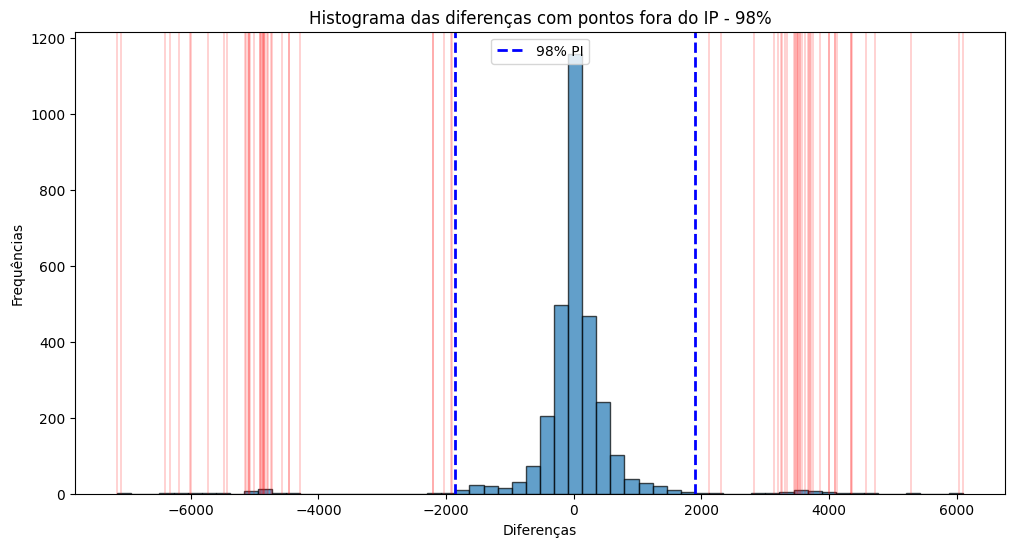

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data['diff'], bins=60, edgecolor='k', alpha=0.7)
plt.axvline(pi_98[0], color='blue', linestyle='dashed', linewidth=2, label='98% PI')
plt.axvline(pi_98[1], color='blue', linestyle='dashed', linewidth=2)
for d in data_pi_98['diff']:
  plt.axvline(d, color='red', linewidth=0.25)
plt.title('Histograma das diferenças com pontos fora do IP - 98%')
plt.xlabel('Diferenças')
plt.ylabel('Frequências')
plt.legend()
plt.show()

In [ ]:
p = len(data_pi_98)/len(data)*100
print('percentual de pontos que caem fora do intervalo de previsão de 98 %:')
print(f'{p} %')


percentual de pontos que caem fora do intervalo de previsão de 98 %:
2.5471386040357262 %


In [ ]:
outpred500_pi_98 = data_pi_98[(data_pi_98.index >= 2523) & (data_pi_98.index <= 3023)]
outpred500_pi_98

,real,pred,diff,inferior_95,superior_95,inferior_90,superior_90
2550,0.000000,4894.771231,-4894.771231,-1550.990488,1595.223042,-1294.258204,1338.490758
2643,0.000000,4460.485141,-4460.485141,-1550.990488,1595.223042,-1294.258204,1338.490758
2732,0.000000,5086.294670,-5086.294670,-1550.990488,1595.223042,-1294.258204,1338.490758
2781,0.000000,5150.304353,-5150.304353,-1550.990488,1595.223042,-1294.258204,1338.490758
2887,0.000000,4783.796288,-4783.796288,-1550.990488,1595.223042,-1294.258204,1338.490758
2966,0.000000,5474.492770,-5474.492770,-1550.990488,1595.223042,-1294.258204,1338.490758
3011,0.000000,4747.356397,-4747.356397,-1550.990488,1595.223042,-1294.258204,1338.490758
2554,4895.657395,1276.745682,3618.911713,3344.666907,6490.880437,3601.399191,6234.148153
2644,5188.037578,1445.830052,3742.207526,3637.047090,6783.260620,3893.779374,6526.528336
2737,5053.984227,1344.251609,3709.732618,3502.993739,6649.207269,3759.726023,6392.474985


In [ ]:
data['inferior_98'] = data['real'] + pi_98[0]
data['superior_98'] = data['real'] + pi_98[1]
data


,real,pred,diff,inferior_95,superior_95,inferior_90,superior_90,inferior_98,superior_98
0,6200.376900,6523.196045,-322.819145,4649.386412,7795.599942,4906.118696,7538.867658,4347.810333,8097.176020
1,6250.402251,6210.962493,39.439758,4699.411763,7845.625293,4956.144047,7588.893009,4397.835684,8147.201371
2,6552.748635,6169.751525,382.997110,5001.758147,8147.971677,5258.490431,7891.239393,4700.182068,8449.547755
3,6124.770458,6504.042337,-379.271879,4573.779970,7719.993500,4830.512254,7463.261216,4272.203891,8021.569578
4,6343.576606,6115.806990,227.769616,4792.586118,7938.799648,5049.318402,7682.067364,4491.010039,8240.375726
...,...,...,...,...,...,...,...,...,...
3018,5128.181653,4518.625116,609.556537,3577.191165,6723.404695,3833.923449,6466.672411,3275.615086,7024.980773
3019,4664.154912,4873.990224,-209.835312,3113.164424,6259.377954,3369.896708,6002.645670,2811.588345,6560.954032
3020,4815.533061,4688.622952,126.910109,3264.542573,6410.756103,3521.274857,6154.023819,2962.966494,6712.332181
3021,4812.097524,4582.607170,229.490354,3261.107036,6407.320566,3517.839320,6150.588282,2959.530957,6708.896644


In [ ]:
outpred100_pi_98 = data_pi_98[(data_pi_98.index >= 2523) & (data_pi_98.index <= 2623)]
outpred100_pi_98

,real,pred,diff,inferior_95,superior_95,inferior_90,superior_90
2550,0.000000,4894.771231,-4894.771231,-1550.990488,1595.223042,-1294.258204,1338.490758
2554,4895.657395,1276.745682,3618.911713,3344.666907,6490.880437,3601.399191,6234.148153


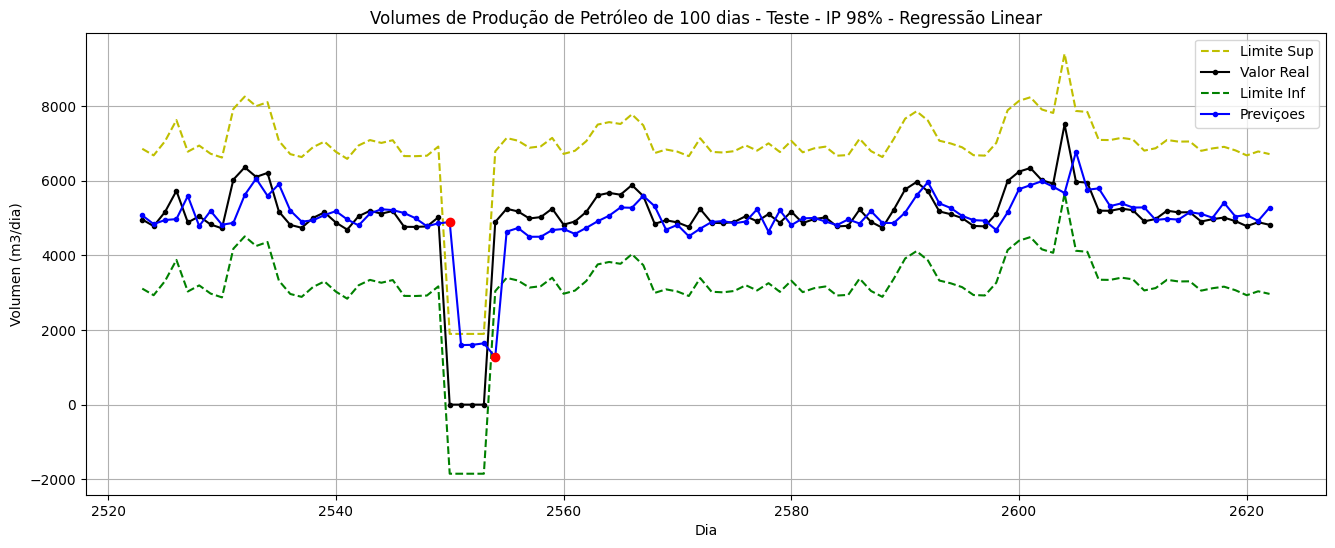

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(data.superior_98[2523:2623], '--y')
plt.plot(data.real[2523:2623], '.-k')
plt.plot(data.inferior_98[2523:2623], '--g')
plt.plot(data.pred[2523:2623], '.-b')
for i in range(len(outpred100_pi_98)):
    plt.plot(outpred100_pi_98.index[i], outpred100_pi_98['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo de 100 dias - Teste - IP 98% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend(['Limite Sup', 'Valor Real', 'Limite Inf', 'Previçoes'])
plt.grid()
plt.show()

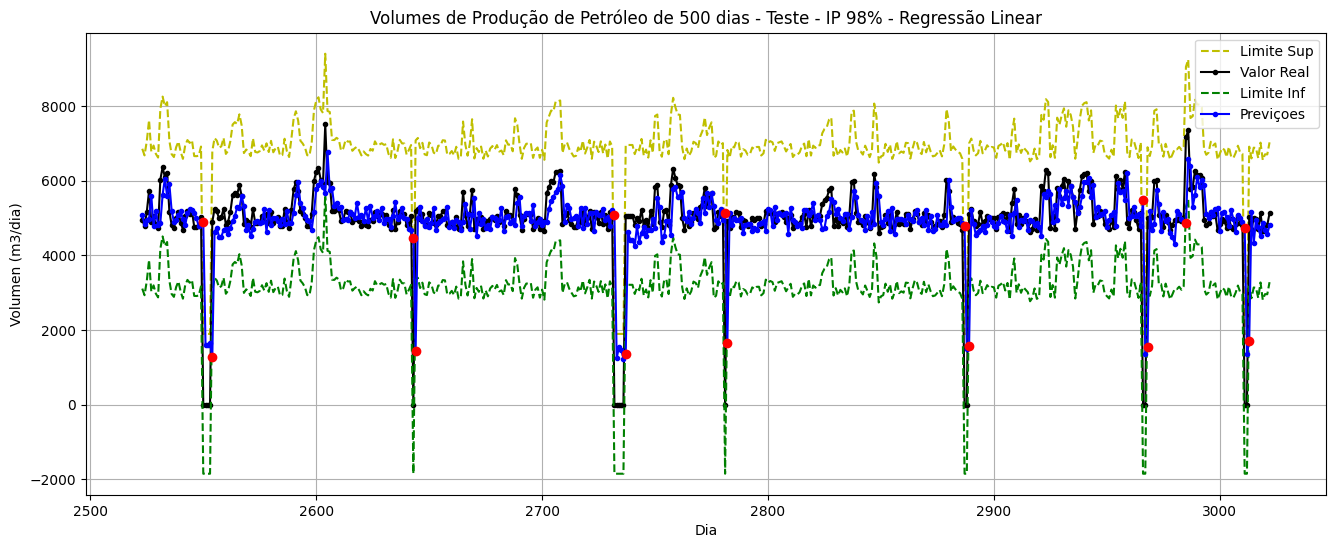

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(data.superior_98[2523:3023], '--y')
plt.plot(data.real[2523:3023], '.-k')
plt.plot(data.inferior_98[2523:3023], '--g')
plt.plot(data.pred[2523:3023], '.-b')
for i in range(len(outpred500_pi_98)):
    plt.plot(outpred500_pi_98.index[i], outpred500_pi_98['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo de 500 dias - Teste - IP 98% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend(['Limite Sup', 'Valor Real', 'Limite Inf', 'Previçoes'])
plt.grid()
plt.show()

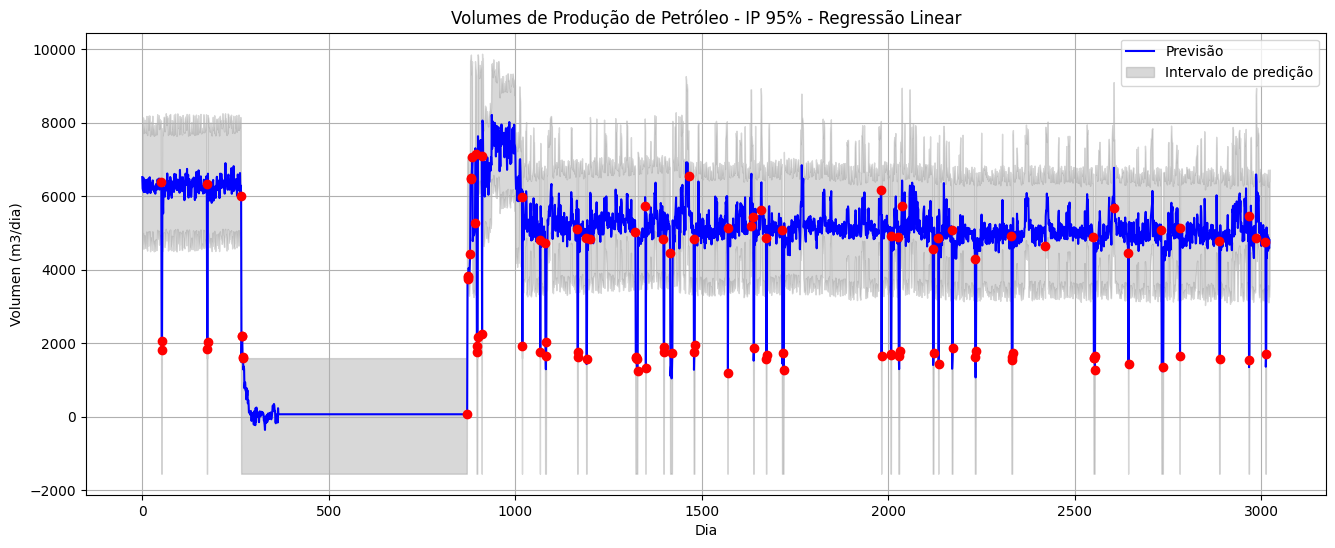

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(data.index, data['pred'], label='Previsão', color='blue')

plt.fill_between(data.index, data['inferior_95'], data['superior_95'], color='gray', alpha=0.3, label='Intervalo de predição')
for i in range(len(data_pi_95)):
    plt.plot(data_pi_95.index[i], data_pi_95['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo - IP 95% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend()

plt.grid()
plt.show()

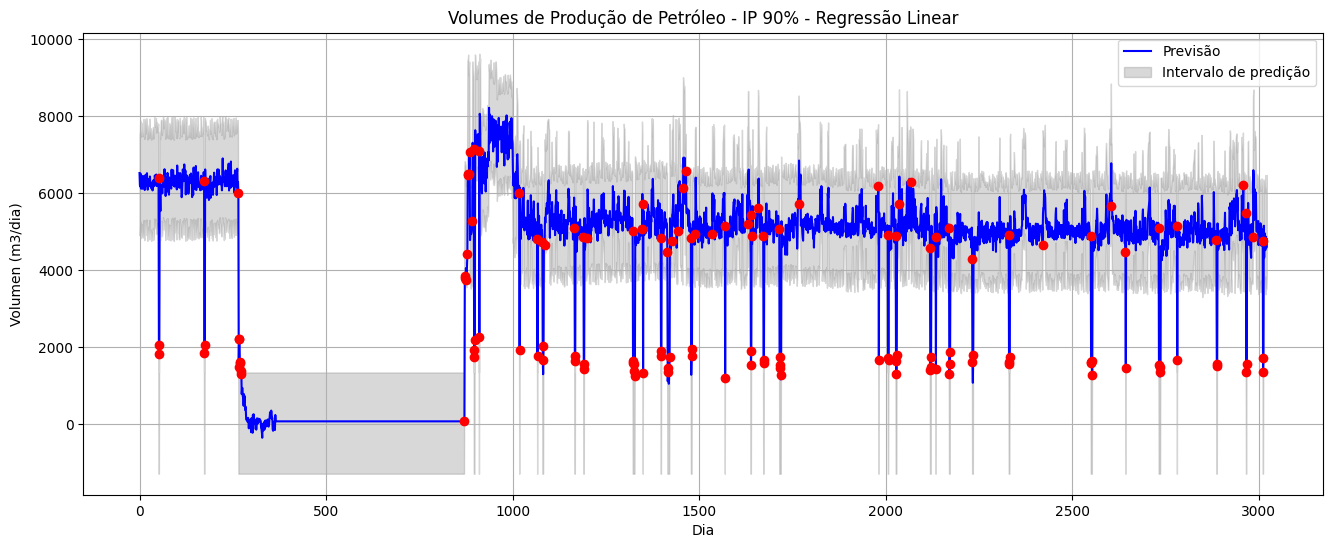

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(data.index, data['pred'], label='Previsão', color='blue')

plt.fill_between(data.index, data['inferior_90'], data['superior_90'], color='gray', alpha=0.3, label='Intervalo de predição')
for i in range(len(data_pi_90)):
    plt.plot(data_pi_90.index[i], data_pi_90['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo - IP 90% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend()

plt.grid()
plt.show()

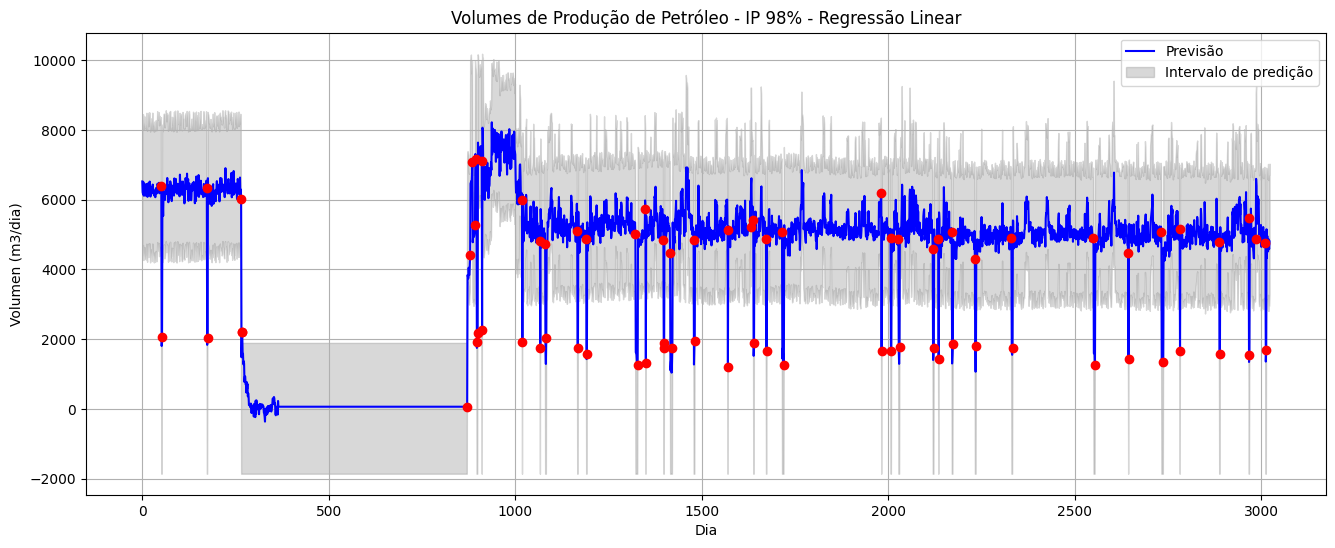

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(data.index, data['pred'], label='Previsão', color='blue')

plt.fill_between(data.index, data['inferior_98'], data['superior_98'], color='gray', alpha=0.3, label='Intervalo de predição')
for i in range(len(data_pi_98)):
    plt.plot(data_pi_98.index[i], data_pi_98['pred'].iloc[i], 'or')
plt.title('Volumes de Produção de Petróleo - IP 98% - Regressão Linear')
plt.xlabel('Dia')
plt.ylabel('Volumen (m3/dia)')
plt.legend()

plt.grid()
plt.show()